# Introduction to Hypothesis Testing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(font_scale=2, palette= "viridis")
import researchpy as rp 

![](../img/population_sample.png)

In [2]:
data = pd.read_csv('../data/pulse_data.csv')
data.head() 

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,BMI,BMICat
0,1.73,57.0,18,Female,No,Yes,Moderate,No,86.0,88.0,19.045073,Underweight
1,1.79,58.0,19,Female,No,Yes,Moderate,Yes,82.0,150.0,18.101807,Underweight
2,1.67,62.0,18,Female,No,Yes,High,Yes,96.0,176.0,22.230987,Normal
3,1.95,84.0,18,Male,No,Yes,High,No,71.0,73.0,22.090730,Normal
4,1.73,64.0,18,Female,No,Yes,Low,No,90.0,88.0,21.383942,Normal


## Inspecting Variables 

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Height    108 non-null    float64
 1   Weight    108 non-null    float64
 2   Age       108 non-null    int64  
 3   Gender    108 non-null    object 
 4   Smokes    108 non-null    object 
 5   Alcohol   108 non-null    object 
 6   Exercise  108 non-null    object 
 7   Ran       108 non-null    object 
 8   Pulse1    107 non-null    float64
 9   Pulse2    107 non-null    float64
 10  BMI       108 non-null    float64
 11  BMICat    108 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 10.2+ KB


## Summarize and Visualize Data 

In [4]:
# summary stats of numerical variables 
data.describe() 

,Height,Weight,Age,Pulse1,Pulse2,BMI
count,108.000000,108.000000,108.000000,107.000000,107.000000,108.000000
mean,1.732685,66.726852,20.592593,75.168224,96.214953,22.031858
std,0.101213,14.808968,3.953082,12.679270,31.550208,3.302788
min,1.400000,41.000000,18.000000,47.000000,56.000000,16.588866
25%,1.660000,56.750000,19.000000,68.000000,72.000000,19.547918
50%,1.730000,63.000000,20.000000,75.000000,84.000000,21.577979
75%,1.800000,75.000000,21.000000,80.500000,122.500000,24.333180
max,1.950000,110.000000,45.000000,145.000000,176.000000,32.140248


In [5]:
# summary stats of numerical variables 
rp.summary_cat(data[['Gender', 'Smokes', 'Alcohol', 'Exercise','Ran','BMICat']])

,Variable,Outcome,Count,Percent
0,Gender,Male,58,53.70
1,,Female,50,46.30
2,Smokes,No,97,89.81
3,,Yes,11,10.19
4,Alcohol,Yes,68,62.96
5,,No,40,37.04
6,Exercise,Moderate,58,53.70
7,,Low,36,33.33
8,,High,14,12.96
9,Ran,No,63,58.33


## One Categorical Variable 
__Questions: Is there any difference in the number of men and women?__

In [6]:
data.Gender.value_counts() 

Male      58
Female    50
Name: Gender, dtype: int64

In [7]:
data.Gender.value_counts(normalize=True) 

Male      0.537037
Female    0.462963
Name: Gender, dtype: float64

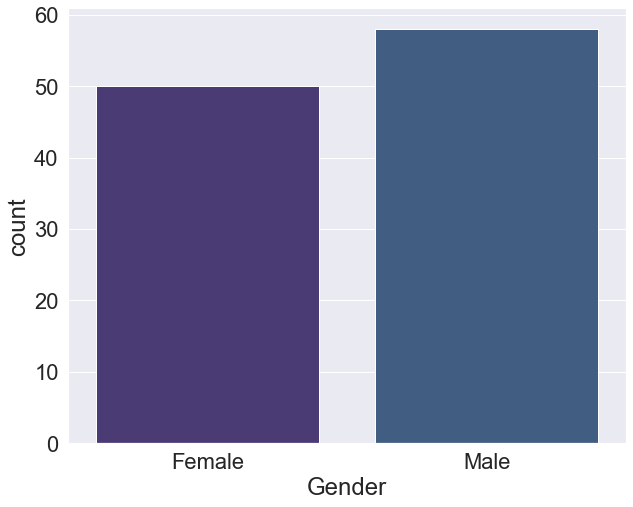

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='Gender')
plt.show()

## One Numeric Variable 
__Question: Is the average height different from a established height?__

In [9]:
data.Height.head() 

0    1.73
1    1.79
2    1.67
3    1.95
4    1.73
Name: Height, dtype: float64

In [10]:
data.Height.describe() 

count    108.000000
mean       1.732685
std        0.101213
min        1.400000
25%        1.660000
50%        1.730000
75%        1.800000
max        1.950000
Name: Height, dtype: float64

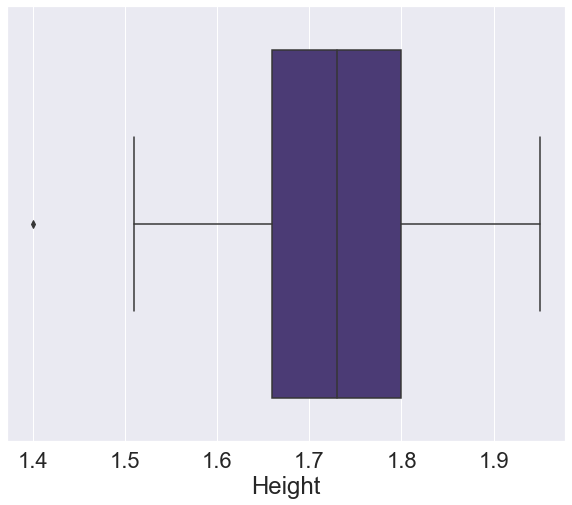

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='Height')
plt.show()

## Two Categorical Variables(C-C)
__Question: Does the porportion of men and women differ across the BMI Category?__

In [12]:
data.Gender.unique() 

array(['Female', 'Male'], dtype=object)

In [13]:
data.BMICat.unique() 

array(['Underweight', 'Normal', 'Overweight', 'Obese'], dtype=object)

In [14]:
pd.crosstab(data['Gender'], data['BMICat'])

BMICat,Normal,Obese,Overweight,Underweight
Gender,,,,
Female,29,0,3,18
Male,33,2,14,9


In [15]:
pd.crosstab(data['Gender'], data['BMICat'], normalize=True)

BMICat,Normal,Obese,Overweight,Underweight
Gender,,,,
Female,0.268519,0.000000,0.027778,0.166667
Male,0.305556,0.018519,0.129630,0.083333


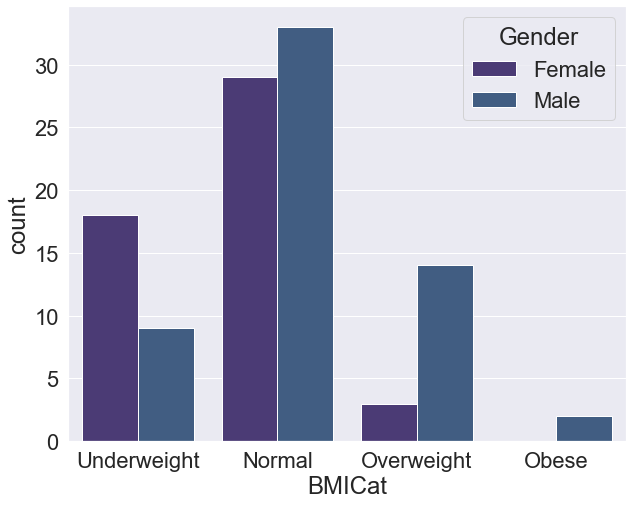

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='BMICat', hue='Gender')
plt.show()

## One Quantitative and One Categorical Variables(Q-C)
__Question: Is there a difference in the height between men and women?__


In [17]:
data.groupby('Gender')['Height'].mean() 

Gender
Female    1.659200
Male      1.796034
Name: Height, dtype: float64

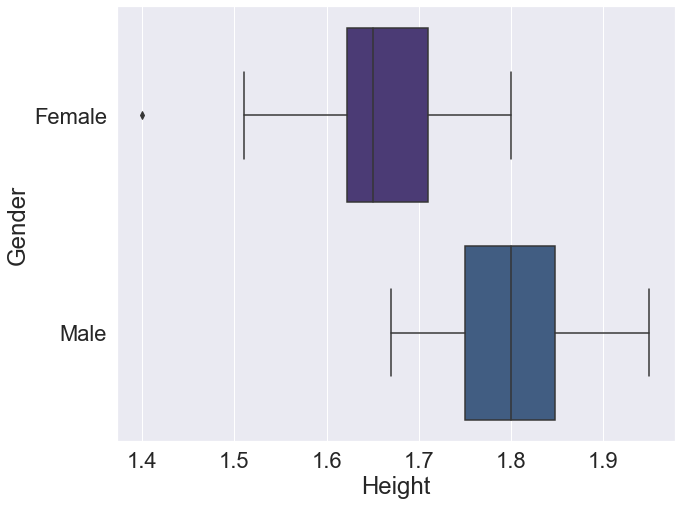

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='Height', y="Gender")
plt.show()

## Two Quantitative Variables(Q-Q) 
__Question: Is there any relationship between height and weight?__

In [19]:
data.Height.corr(data.Weight)

0.7413041988574964

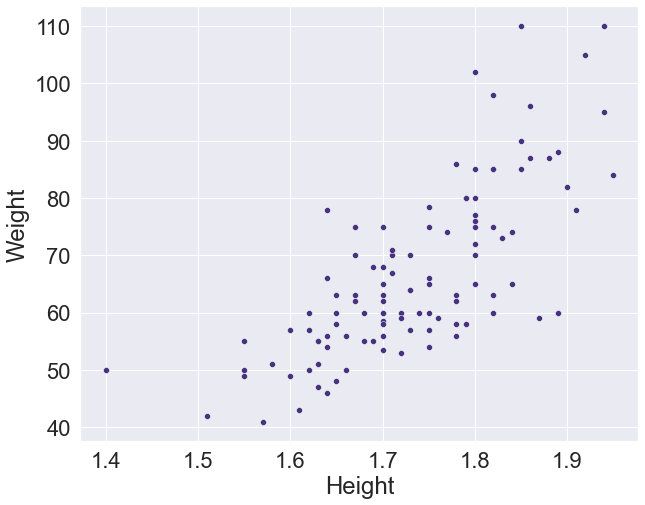

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Height', y="Weight")
plt.show()

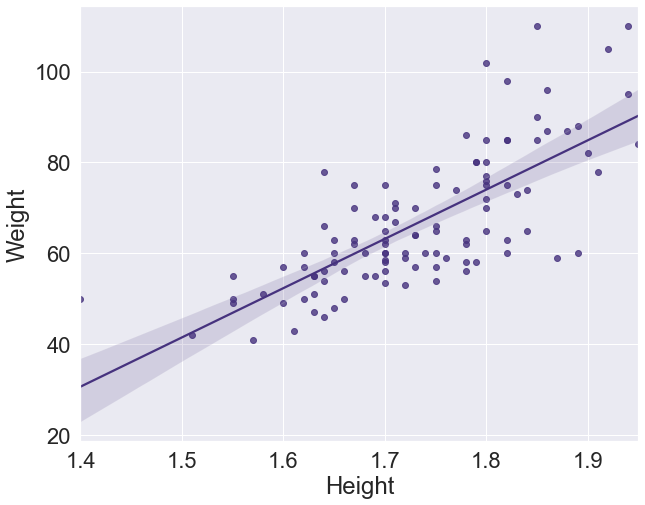

In [22]:
plt.figure(figsize=(10,8))
sns.regplot(data=data, x='Height', y="Weight")
plt.show()

## What is Inferential Statistics 
Assess the strength of evidence for/against a hypothesis; evaluate the data

- Inferential statistical methods provide a confirmatory data analysis.
    - Generalize conclusions from data from part of a group (sample) to the whole group (population)
    - Assess the strength of the evidence
    - Make comparisons
    - Make predictions
Inferential statistical methods divide into 2 categories.

- **Hypothesis Testing:** Hypothesis testing is a formal procedure for investigating our ideas about the world using statistics. It is most often used by scientists to test specific predictions, called hypotheses, that arise from theories.

- **Model Fitting:** Model fitting is a measure of how well a statistical learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes.

## What is Inference?
The process of drawing conclusions about population parameters based on a sample taken from the population.

- A sample is likely to be a good representation of the population.
- There is an element of uncertainty as to how well the sample represents the population.
- The way the sample is taken matters.

## What is Hypothesis?
- Proposed explanation for a phenomenon.
- A hypothesis is an educated guess about something in the world around you. It should be testable, either by experiment or observation. 

- Proposed explanation
- Objectively testable 
- Singular - hypothesis
- Plural - hypotheses

__Examples__

- A new medicine you think might work.
- A way of teaching you think might be better.
- A possible location of new species.




## Hypothesis and Study Design
- **Hypothesis:**  seat belts decreases the fatality rate 
- **Study design:** cross-sectional study of fatality outcome and seat-belt use of victims of motor vehicle accidents during a one-month time period in a large city

![](../img/seat_belt.png)

## Effect of Seat Belt Use on Accident Fatality
What is your conclusion?
- The fatality rate is:
    - 40% in the group of drivers who did not wear seat belts
    - 20% in drivers who did wear seat belts

- Seat belts appear to save lives

## The Inferential Questions of Interest
- The inferential questions of interest are:
    - Are results applicable to the population of all drivers?
      (generalization)
    - Does wearing seat belts decreases fatality rate? (assess strength of evidence)
- Is the fatality rate of those not wearing seat belts higher than the fatality rate of those wearing seat belts? (comparison)
- How many lives can be saved by wearing seat belts? (prediction)
- Do other variables influence the conclusion?
    - For example: the age of driver, alcohol use, type of car, speed at impact (ask more questions)

## Speed at Impact

![](../img/seat_belt2.png)

## How Does This Influence Your Conclusion?
- How does this influence your conclusion?
    - The fatality rate is 10% at low-impact speeds regardless of seat-belt use

- The fatality rate at high impact speeds is:
    -  60% in drivers not wearing seat belts
    -  35% in drivers wearing seat belts

## Null and Alternative Hypothesis
- **Hypothesis 0 (H0):** Assumption of the test holds and is failed to be rejected at some level of significance.
- **Hypothesis 1 (Ha):** Assumption of the test does not hold and is rejected at some level of significance.

## Errors in Statistical Tests
- **Type I Error:** The incorrect rejection of a true null hypothesis or a false positive.
- **Type II Error:** The incorrect failure of rejection of a false null hypothesis or a false negative.

![imgaes](../img/errors.png)

## Alpha($\alpha$)
- $\alpha$ is probability of rejecting H0 when H0 is true. 
- $\alpha$ = Probability of Type-I error. 
- Ranges from 0 to 1
- **High α is not good**

## p-value
In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. 

generally cut off value of alpha 0.05
- If p-value > alpha: Fail to reject the null hypothesis (i.e. not significant result).
- If p-value <= alpha: Reject the null hypothesis (i.e. significant result).

## Hypothesis Testing Process 

- **Step-1:** Null Hypothesis H0
    - True until proven false
    - Usually posits no relationship

- **Step-2:** Select Test
    - Pick from vast library
    - Know which one to choose

- **Step-3:** Significance Level
    - Usually 1% or 5%
    - What threshold for luck?

- **Step-4:** Alternative Hypothesis
    - Negation of null hypothesis
    - Usually asserts specific relationship
    
- **Step-5:** Test Statistic
    - Convert to p-value
    - How likely it was just luck?


- **Step-6:** Accept or Reject
    - Small p-value? Reject H0 
    - Small: Below significance level 

![images](../img/hypothesis.png)

# Common Statistical Tests
### Variable Distribution Type Tests (Gaussian)
- Shapiro-Wilk Test
- D’Agostino’s K^2 Test
- Anderson-Darling Test

### Variable Relationship Tests (correlation)
- Pearson’s Correlation Coefficient
- Spearman’s Rank Correlation
- Kendall’s Rank Correlation
- Chi-Squared Test

### Compare Sample Means (parametric)
- Student’s t-test
- Paired Student’s t-test
- Analysis of Variance Test (ANOVA)
- Repeated Measures ANOVA Test

### Compare Sample Means (nonparametric)
- Mann-Whitney U Test
- Wilcoxon Signed-Rank Test
- Kruskal-Wallis H Test
- Friedman Test

## Statistical Test Selection 
What we observe in our sample data | Is it real?(statistical test)|
----------|------|
1 categorical variable| 1 sample proportion test
2 categorical variables | chi squared test
1 numeric variable | t-test
1 numeric and 1 categorical variable | t-test or ANOVA
more than 2 categorical variables | ANOVA
2 numeric variables | correlation test

## References
- https://machinelearningmastery.com/statistical-hypothesis-tests/
- https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/